In [1]:
from src.document_db import DocumentsDB

db = DocumentsDB()

[nltk_data] Downloading package stopwords to /home/kanstantsin-
[nltk_data]     downar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/kanstantsin-
[nltk_data]     downar/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /home/kanstantsin-
[nltk_data]     downar/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
import numpy as np

random_index = np.random.randint(0, 99)
similar_documents = db.get_similar_documents(random_index, 5, print_results=True)

[np.float64(0.09006612507589287), np.float64(0.08121949438428502), np.float64(0.07257941594403342), np.float64(0.07222656257579606), np.float64(0.06466305428461654)]


In [3]:
speed_info = db.get_speed_statistics()
speed_info.print_statistics()

Data load speed: 0.00937 seconds
Data preprocessing speed: 3.03741 seconds
TF-IDF matrix build speed: 2.90521 seconds
Inverted index build speed: 0.00000 seconds
Search process speed: 0.00242 seconds


In [5]:
random_index = np.random.randint(0, 99)
dataset_size = []
load_speed = []
preprocess_speed = []
matrix_build_speed = []
inverted_index_build_speed = []
search_speed = []
for i in range(100, 2001, 100):
    db = DocumentsDB(data_path=f"datasets/documents{i}.csv")
    similar_documents = db.get_similar_documents(random_index, 5)
    speed_info = db.get_speed_statistics()
    dataset_size.append(i)
    load_speed.append(speed_info.load_speed)
    preprocess_speed.append(speed_info.preprocess_speed)
    matrix_build_speed.append(speed_info.matrix_build_speed)
    inverted_index_build_speed.append(speed_info.inverted_index_build_speed)
    search_speed.append(speed_info.search_speed)

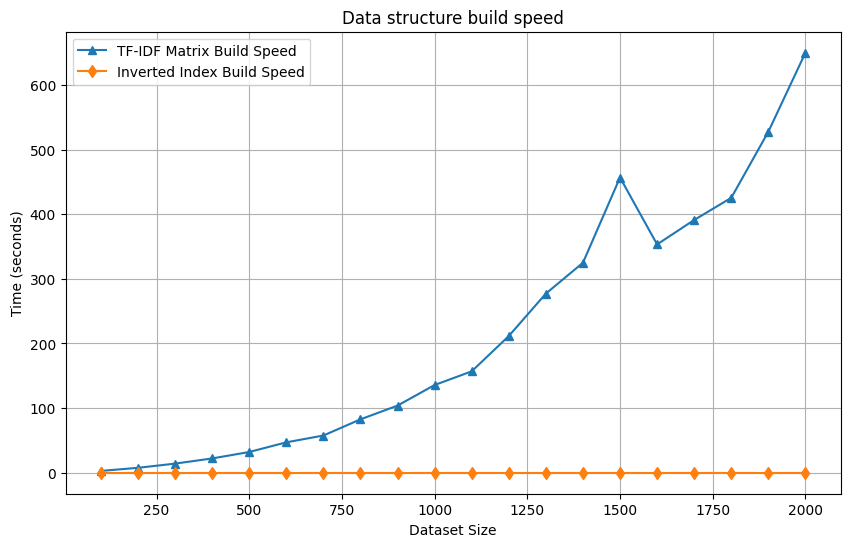

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(dataset_size, matrix_build_speed, label="TF-IDF Matrix Build Speed", marker="^")
plt.plot(dataset_size, inverted_index_build_speed, label="Inverted Index Build Speed", marker="d")

plt.xlabel("Dataset Size")
plt.ylabel("Time (seconds)")
plt.title("Data structure build speed")
plt.legend()
plt.grid(True)

plt.show()

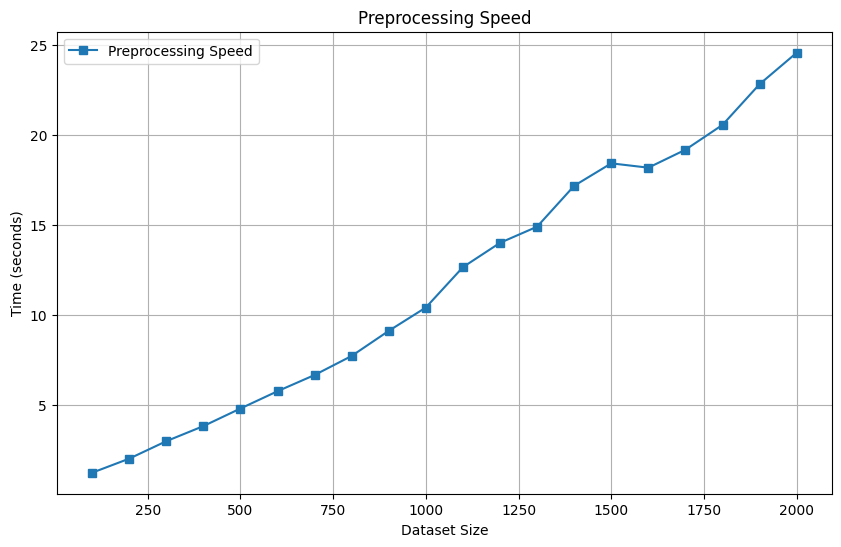

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_size, preprocess_speed, label="Preprocessing Speed", marker="s")

plt.xlabel("Dataset Size")
plt.ylabel("Time (seconds)")
plt.title("Preprocessing Speed")
plt.legend()
plt.grid(True)

plt.show()

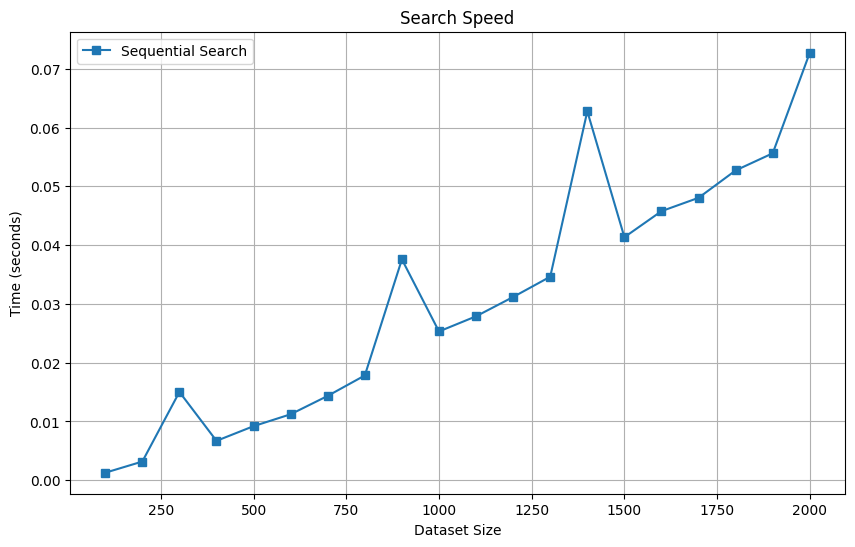

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(dataset_size, search_speed, label="Sequential Search", marker="s")

plt.xlabel("Dataset Size")
plt.ylabel("Time (seconds)")
plt.title("Search Speed")
plt.legend()
plt.grid(True)

plt.show()